In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Great_Learning/Intro to Neural Networks & Deep Learning/Project_1")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Great_Learning/Intro to Neural Networks & Deep Learning/Project_1'

# 1. Read the dataset

In [4]:
df=pd.read_csv("Churn.csv")
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
604,605,15609286,Chadwick,702,France,Male,37,10,150525.80,1,1,1,94728.49,0
1751,1752,15632256,Schroeder,541,France,Male,29,7,127504.57,1,0,0,86173.92,0
6006,6007,15636395,King,529,France,Female,31,5,0.00,2,1,0,26817.23,0
4193,4194,15802362,Newland,550,Spain,Male,45,0,0.00,2,0,1,70399.71,0
8103,8104,15740223,Walton,479,Germany,Male,51,1,107714.74,3,1,0,86128.21,1
6715,6716,15763111,Niu,808,Spain,Female,67,10,124577.15,1,0,1,169894.40,0
1639,1640,15723053,T'ang,504,Germany,Male,32,8,170291.22,2,0,1,15658.99,0
8645,8646,15669282,Uchechukwu,636,France,Female,20,10,124266.86,1,0,0,100566.81,0
373,374,15688074,Gregory,802,Germany,Male,31,1,125013.72,1,1,1,187658.09,0
6423,6424,15600720,Moore,652,Spain,Male,41,8,115144.68,1,1,0,188905.43,0


# 2. Drop the columns which are unique for all users like IDs (2.5 points)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Inferences:-
### 1.We have 14 attributes and have very good amount of data(i.e. about 10000 entries) for modelling.
### 2. We have 13 independent variables and 1 dependent variables/target attribute(i.e. Exited).
### 3.Except "Surname", "Geography" and "Gender" attribute which is of object datatype, all the other attribute columns are having data type as float64 or int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Inferences:-
### 1. "CreditScore", "Age", "Tenure", "IsActiveMember" is normally distributed.
### 2. "Balance" is left skewed.
### 3. "NumOfProducts" , "HasCrCard" , "Estimated Salary" is right skewed.

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 14 columns and 10000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


## Inference:-
### This dataset has no missing values.

In [8]:
for col in df:
    print(col,':',df[col].nunique()) #Finding number of unique values in each column

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


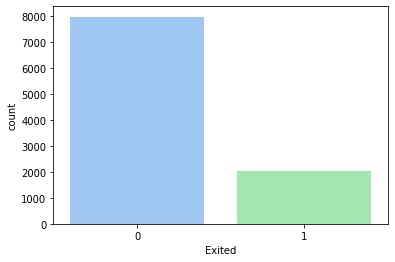

In [9]:
plt.style.use('seaborn-pastel')
sns.countplot(df['Exited'])

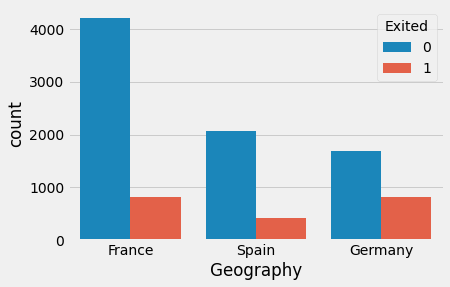

In [10]:
plt.style.use('fivethirtyeight')
sns.countplot(x='Geography',data=df,hue='Exited')

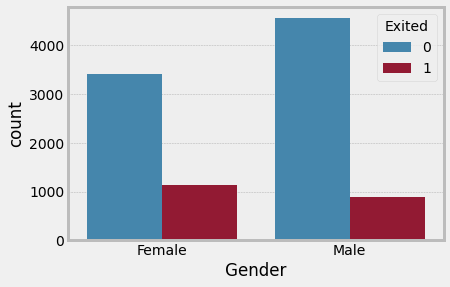

In [11]:
plt.style.use('bmh')
sns.countplot(x='Gender',data=df,hue='Exited')

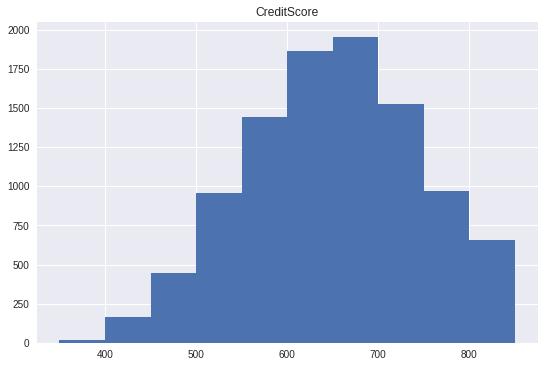

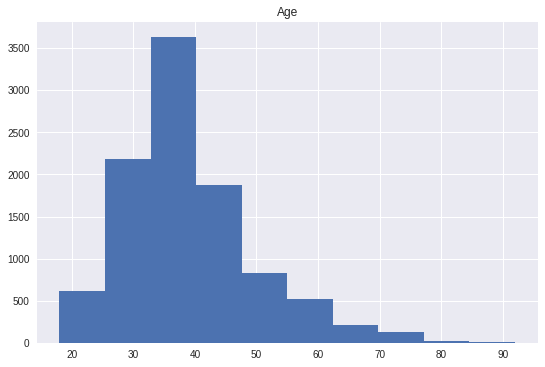

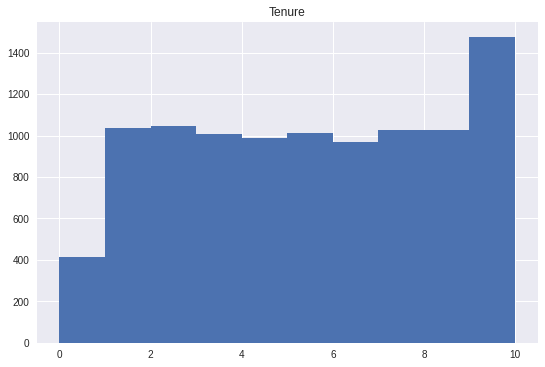

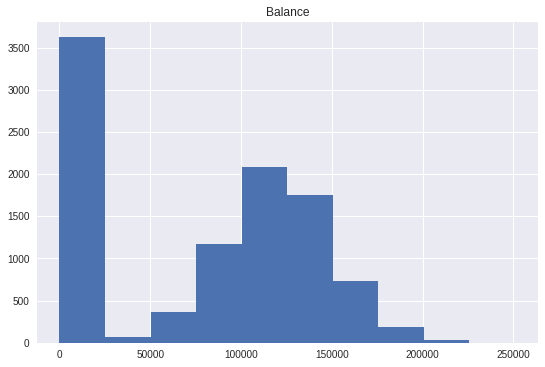

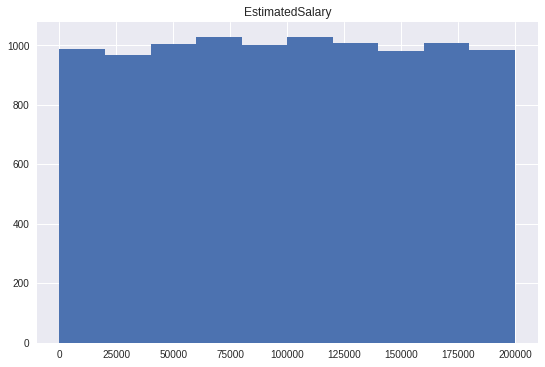

In [12]:
numerical_distribution = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in numerical_distribution:
    plt.style.use('seaborn')
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [13]:
data=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)
data.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6378,562,France,Male,37,2,0.00,1,0,1,52525.15,1
4494,850,Spain,Male,31,6,82613.56,2,1,0,149170.92,0
8517,688,France,Male,20,8,137624.40,2,1,1,197582.79,0


### Removing CustomerId, RowNumber and Surname. Removing Surname is basically because One Hot Encoding will behave unusual if this column is retained(can give error)

# 3. Distinguish the feature and target set (2.5 points)

In [14]:
#using labelencoder to encode the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])
data.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2361,686,1,0,43,5,154846.24,2,1,1,151903.60,0
1473,552,0,1,36,8,0.00,2,0,0,132547.02,0
2693,662,0,1,34,2,0.00,2,0,1,21497.27,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


## Inference:-
### Final dataset has 10 features and 1 target column.

In [16]:
X=data.iloc[:,:-1] #feature
y=data.Exited #target

# 4. Divide the data set into training and test sets ( 2.5 points)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=data['Exited'])
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (7000, 10)
X_test: (3000, 10)


# 5. Normalize the train and test data (5 points)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# 6. Initialize & build the model. { Make sure that you add 2 to 5 hidden dense layers in this model } (10 points)

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU

# defining the model architecture

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(50, activation='relu', input_shape=(10,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 2,146
Trainable params: 2,146
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs = 50
batch_size = 256


history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=True)
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)

Epoch 1/50
20/20 [==============================] - 1s 27ms/step - loss: 0.7343 - accuracy: 0.2935 - val_loss: 0.6669 - val_accuracy: 0.7348
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.7764 - val_loss: 0.5818 - val_accuracy: 0.7886
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.8011 - val_loss: 0.5091 - val_accuracy: 0.7886
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.8021 - val_loss: 0.4815 - val_accuracy: 0.7886
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.7972 - val_loss: 0.4601 - val_accuracy: 0.7900
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.7978 - val_loss: 0.4467 - val_accuracy: 0.7957
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.8062 - val_loss: 0.4356 - val_accuracy: 0.8019
Epoch 8/50
20/20 [=

#7. Predict the results (5 points)

[0.7347618937492371, 0.7885714173316956, 0.7885714173316956, 0.7885714173316956, 0.7900000214576721, 0.795714259147644, 0.8019047379493713, 0.8071428537368774, 0.8138095140457153, 0.8219047784805298, 0.8280952572822571, 0.8304761648178101, 0.8357142806053162, 0.842380940914154, 0.8452380895614624, 0.8461904525756836, 0.8485714197158813, 0.8500000238418579, 0.8514285683631897, 0.8504762053489685, 0.8523809313774109, 0.8509523868560791, 0.8523809313774109, 0.8500000238418579, 0.8495237827301025, 0.8509523868560791, 0.8528571724891663, 0.8528571724891663, 0.8495237827301025, 0.8514285683631897, 0.8523809313774109, 0.8519047498703003, 0.8523809313774109, 0.8514285683631897, 0.8523809313774109, 0.8495237827301025, 0.8514285683631897, 0.8552380800247192, 0.8519047498703003, 0.8490476012229919, 0.8504762053489685, 0.8523809313774109, 0.854285717010498, 0.854285717010498, 0.8495237827301025, 0.8509523868560791, 0.8485714197158813, 0.8519047498703003, 0.8533333539962769, 0.8538095355033875]
[0.

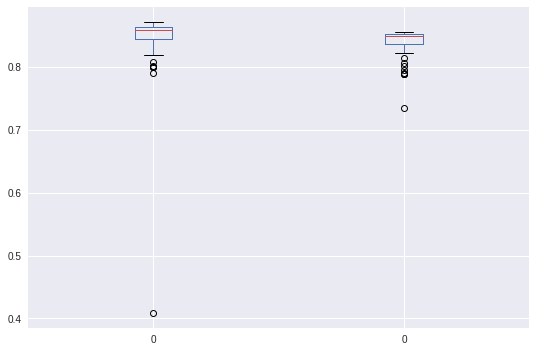

In [21]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [22]:
y_pred = np.round(model.predict(X_test))

In [23]:
y_pred[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

# 8. Print the Accuracy score and confusion matrix (2.5 points)

In [24]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)

Test Accuracy: 0.863
Train Accuracy: 0.867


## Inferences:-
### 1.Train and Test accuracy is same so the model is neither overfit or underfit.
### 2. 86.3% of testing data was classified correctly.

In [25]:
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

        pred:0  pred:1
true:0    2278     111
true:1     299     312


## Inference:- 
### 1.The accuracy based on the Confusion Matrixis is 86.3 %(APPROX). which matches with the score calculated through various EPOCH
### 2. Recall is 88.40% and Precision is 95.35%.